In [1]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
from analysis.lib.fitting import fit, common
import inspect
%matplotlib inline

d:\measuring\data
d:\measuring\data


In [2]:
#d1=np.loadtxt(r'D:\measuring\data\20150318\115243_Saturation_curve_Pippin_SIL1_PSB_PQ01018115\115243_Saturation_curve_Pippin_SIL1_PSB_PQ01018115.dat', skiprows=4)
#d2=np.loadtxt(r'D:\measuring\data\20150318\115942_Saturation_curve_Pippin_SIL1_PSB_PQ01023273\115942_Saturation_curve_Pippin_SIL1_PSB_PQ01023273.dat', skiprows=4)
d= np.loadtxt(r'X:\data\20150626\LT4_PO_CableInserted.dat', skiprows=10)

In [25]:
y2=d[:,0]
y=d[:,1]
x=np.arange(len(y))*0.128+5419

In [26]:
f = common.fit_gauss
args=np.arange(len(inspect.getargspec(f)[0]))
print f(*args)[2]
print inspect.getargspec(f)[0]

a + A * exp(-(x-x0)**2/(2*sigma**2))
['g_a', 'g_A', 'g_x0', 'g_sigma']


In [27]:
args=[0,100,5424,1.]
fitres = fit.fit1d(x, y, f,*args, fixed = [0],
                   do_print = True, ret = True, maxfev=100)

Converged with chi squared  2554.03253391
degrees of freedom, dof  68
RMS of residuals (i.e. sqrt(chisq/dof))  6.12856442972
Reduced chisq (i.e. variance of residuals)  37.5593019692

fitted parameters at minimum, with 68% C.I.:
 0 x0          5423.149347 +/-   0.018442
 1 A            138.969892 +/-   2.212753
 2 sigma          0.967321 +/-   0.017413

correlation matrix:
               x0        A         sigma     
        x0  1.000000
         A  0.375532  1.000000
     sigma -0.322361 -0.627555  1.000000



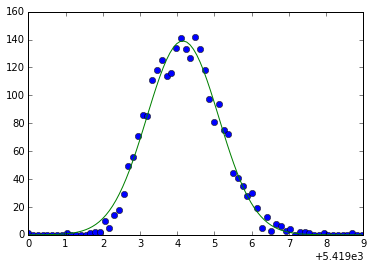

In [28]:
p1 = fitres['params_dict']
plt.plot(x,y, 'o')
plot_pts=100
x_p=np.linspace(min(x),max(x),plot_pts)
if fitres['success']:
    f_p = fitres['fitfunc'](x_p)
    plt.plot(x_p,f_p)
#f_g = f(*args)[1](x_p)
#plt.plot(x_p,f_g)

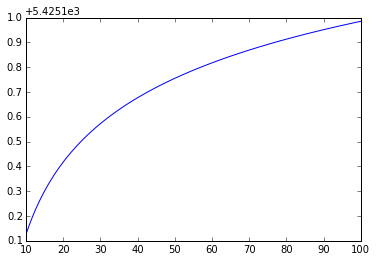

In [29]:
x0=p1['x0']
sigma = p1['sigma']
a=0
A = p1['A']
fA=np.linspace(10,100,100)
yy=x0+np.sqrt(2)*np.sqrt(sigma**2*np.log(fA))
plt.plot(fA,yy)

In [19]:
fit_functions = [f for _, f in common.__dict__.iteritems() if callable(f)]
for f in fit_functions:
    try:
        args=arange(len(inspect.getargspec(f)[0]))
        print f.__name__,':  ', 
        print f(*args)[2]
        print inspect.getargspec(f)[0]
        print '-'*
    except:
        continue

fit_sum_2cos :   (A*cos(2pi * (fa*x + phi_a/360) )+ B*cos(2pi * (f_b*x + phi_b/360)))/2 + avg
['g_avg', 'g_A', 'g_f_a', 'g_phi_a', 'g_B', 'g_f_b', 'g_phi_b']
--------------------
fit_cos :   A * cos(2pi * (f*x + phi/360) ) + a
['g_f', 'g_a', 'g_A', 'g_phi']
--------------------
fit_line :   a + b*x
['g_a', 'g_b']
--------------------
fit_saturation_with_offset_linslope :   a + b*x + A * x / (x + x_sat)
['g_a', 'g_b', 'g_A', 'g_xsat']
--------------------
fit_AOM_powerdependence :   a * exp(-exp(-k*(x-xc)))
['g_a', 'g_xc', 'g_k']
--------------------
fit_general_exponential :   a + A * exp(-((x-x0)/T )**n)
['g_a', 'g_A', 'g_x0', 'g_T', 'g_n']
--------------------
fit_double_decaying_cos :   (A1 *exp(-x/t1) cos(2pi * (f1*x + phi1/360) ) + a1)*
                     (A2 *exp(-x/t2) cos(2pi * (f2*x + phi2/360) ) + a2)/2+ o 
['g_f1', 'g_A1', 'g_phi1', 'g_t1', 'g_f2', 'g_A2', 'g_phi2', 'g_t2', 'g_o']
--------------------
fit_general_exponential_dec_cos :   a + A * exp(-((x-x0)/T )**n*cos(2pi 